<a href="https://colab.research.google.com/github/YABIGAIL23/INVESTIGACI-N-DE-OPERACIONES/blob/main/PERT_CPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Ruta Crítica</font>


La guía para la Dirección de Proyectos (mas conocido como PMBOK Guide), define la ruta crítica como:

*“La secuencia de actividades programadas que determina la duración del proyecto”.*

Para finalizar un proyecto, debemos realizar todas las actividades que lo componen. Algunas actividades pueden hacerse en simultáneo, sin embargo otras deben hacerse siguiendo un orden determinado. Por ejemplo, si voy a construir una casa, primero debo construir las paredes antes de pintarlas. De todas las secuencias de actividades que forman el proyecto, la secuencia que tiene mayor duración será la ruta crítica y determina el tiempo total del proyecto.


##<font color="green">¿Para qué sirve la ruta crítica?</font>

El uso del método de ruta crítica CPM y de la ruta crítica ayuda en muchos aspectos a gestionar los proyectos con más eficiencia y finalizarlos a tiempo. Es particularmente útil para:

- Planificar y gestionar proyectos complejos que consisten de muchas tareas con diferentes duraciones y dependencias entre ellas.
- Optimizar el uso de los recursos y garantizar que las actividades críticas tengan los recursos suficientes.
- Identificar tareas de alto riesgo que podrían retrasar el proyecto.
- Garantizar la completación del proyecto en una fecha límite específica.
- Gestionar los cambios cuando hay modificaciones en el alcance del proyecto o en el cronograma.
- Llevar control y seguimiento de proyecto y su progreso.
Comunicar claramente el enfoque del proyecto a sus participantes.

###<font color="blue">Ejemplo: Desarrollo de un sistema web sencillo</font>

Actividades del proyecto:

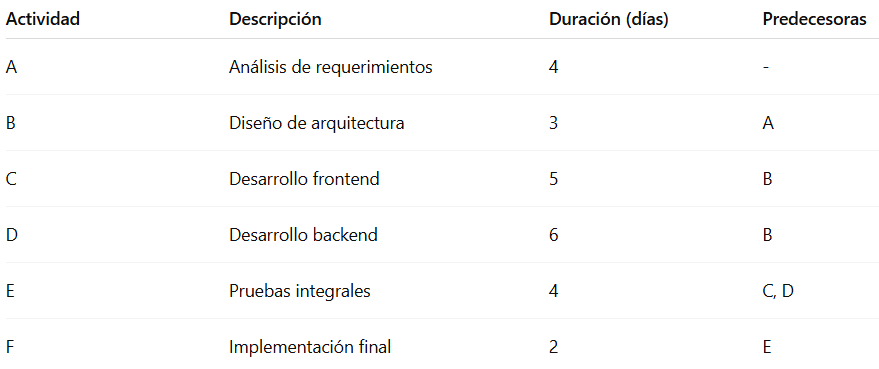

In [ ]:
#Agregar librerias
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
#Datos del proyecto (Actividad, Duración, Predecesoras)
actividades = [
    ("A", 4, []),          #Análisis - 4 días - Sin predecesoras
    ("B", 3, ["A"]),       #Diseño - 3 días - Después de A
    ("C", 5, ["B"]),       #Frontend - 5 días - Después de B
    ("D", 6, ["B"]),       #Backend - 6 días - Después de B
    ("E", 4, ["C", "D"]),  #Pruebas - 4 días - Después de C Y D
    ("F", 2, ["E"])        #Implementación - 2 días - Después de E
]

In [ ]:
#Crear grafo
G = nx.DiGraph()

#Agregar actividades y conexiones
for act, dur, preds in actividades:
    G.add_node(act, duracion=dur)
    for pred in preds:
        G.add_edge(pred, act)

In [ ]:
#Agregar y conectar nodos inicio/fin
G.add_node("Inicio", duracion=0)
G.add_node("Fin", duracion=0)

for act, _, preds in actividades:
    if not preds:
        G.add_edge("Inicio", act)

for act, _, _ in actividades:
    if not list(G.successors(act)):
        G.add_edge(act, "Fin")

###FORWARD PASS (Cálculo hacia adelante)

Objetivo: Calcular tiempos más tempranos

- ES (Earliest Start): Tiempo más temprano para comenzar
- EF (Earliest Finish): Tiempo más temprano para terminar

###BACKWARD PASS (Cálculo hacia atrás)

Objetivo: Calcular tiempos más tardíos

- LS (Latest Start): Tiempo más tardío para comenzar sin retrasar el proyecto
- LF (Latest Finish): Tiempo más tardío para terminar sin retrasar el proyecto

In [ ]:
#Calcular tiempos
"ES = Máximo(EF de todas las predecesoras)"
"EF = ES + Duración"
"LF = Mínimo(LS de todas las sucesoras)"
"LS = LF - Duración"

def calcular_tiempos(grafo):
    ES, EF, LS, LF = {}, {}, {}, {}

    #Forward pass
    for nodo in nx.topological_sort(grafo):
        preds = list(grafo.predecessors(nodo))
        ES[nodo] = max(EF[p] for p in preds) if preds else 0
        EF[nodo] = ES[nodo] + grafo.nodes[nodo]['duracion']

    #Backward pass
    duracion_total = EF["Fin"]
    for nodo in reversed(list(nx.topological_sort(grafo))):
        sucs = list(grafo.successors(nodo))
        LF[nodo] = min(LS[s] for s in sucs) if sucs else duracion_total
        LS[nodo] = LF[nodo] - grafo.nodes[nodo]['duracion']

    return ES, EF, LS, LF

ES, EF, LS, LF = calcular_tiempos(G)

###CÁLCULO DE HOLGURAS
Holgura (Slack/Float):

Tiempo que una actividad puede retrasarse sin afectar la duración total del proyecto.

In [ ]:
"Holgura = LS - ES = LF - EF"
#Calcular holguras y ruta crítica
holguras = {act: LS[act] - ES[act] for act in G.nodes()}

#Secuencia de actividades con holgura = 0. Cualquier retraso en estas actividades retrasará todo el proyecto.
ruta_critica = [act for act in G.nodes() if holguras[act] == 0 and act not in ["Inicio", "Fin"]]


RESUMEN CPM
Duración total: 19 días
Ruta crítica: A → B → D → E → F

Detalles por actividad:
A: ES=0, EF=4, LS=0, LF=4, Holgura=0
B: ES=4, EF=7, LS=4, LF=7, Holgura=0
C: ES=7, EF=12, LS=8, LF=13, Holgura=1
D: ES=7, EF=13, LS=7, LF=13, Holgura=0
E: ES=13, EF=17, LS=13, LF=17, Holgura=0
F: ES=17, EF=19, LS=17, LF=19, Holgura=0


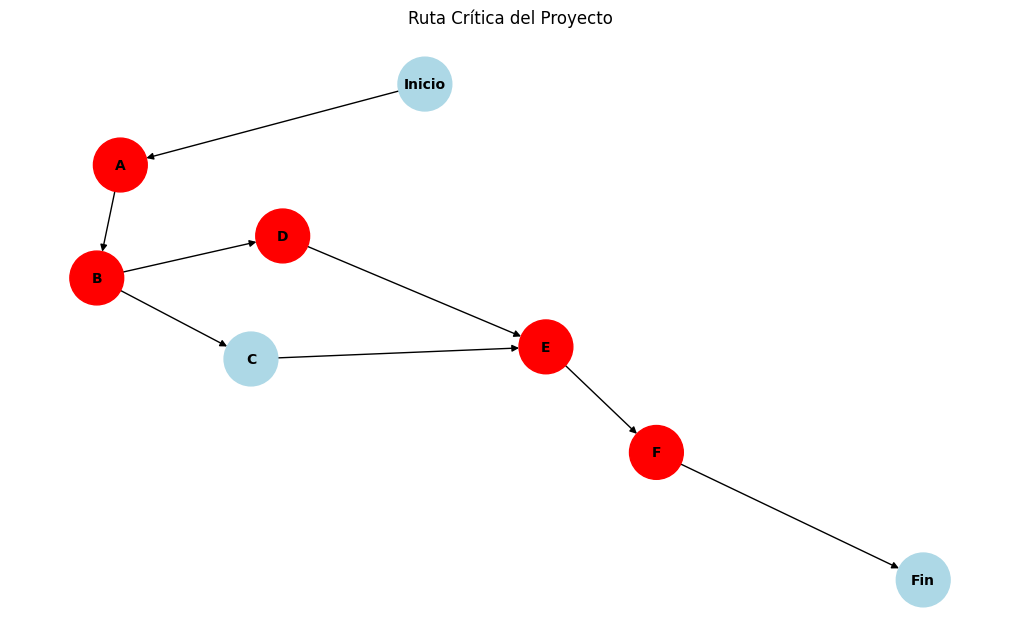

In [ ]:
#Mostrar resultados
print("RESUMEN CPM")
print(f"Duración total: {EF['Fin']} días")
print(f"Ruta crítica: {' → '.join(ruta_critica)}")

print("\nDetalles por actividad:")
for act, dur, _ in actividades:
    print(f"{act}: ES={ES[act]}, EF={EF[act]}, LS={LS[act]}, LF={LF[act]}, Holgura={holguras[act]}")

#Visualización simple
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)

#Colores: rojo para críticas, azul para normales
colores = ["red" if nodo in ruta_critica else "lightblue" for nodo in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=colores, node_size=1500,
        arrows=True, font_size=10, font_weight='bold')

plt.title("Ruta Crítica del Proyecto")
plt.show()

###<font color="green">Referencias:</font>


https://www.plandemejora.com/como-calcular-la-ruta-critica/

https://dudasytareas.wordpress.com/wp-content/uploads/2017/05/hillier_lieberman.pdf

